In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set_theme(style="whitegrid")


In [3]:
#  Load CSV from local path (download from Drive first)
SRC = "flight_delay_3m_clean_single_reason.csv" 
df = pd.read_csv(SRC)
df.head(10)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,DEP_TIME_STR,DEP_HOUR,Month,DayOfWeek,ROUTE,DELAY_REASON
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,NaN,NaN,NaN,NaN,11:51,11.0,1,3,FLL-EWR,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,NaN,NaN,NaN,NaN,21:14,21.0,11,6,MSP-SEA,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,NaN,NaN,NaN,NaN,10:00,10.0,7,5,DEN-MSP,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,24.0,0.0,0.0,16:08,16.0,3,1,MSP-SFO,Nas
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,NaN,NaN,NaN,NaN,18:38,18.0,2,7,MCO-DFW,NaN
5,2019-07-31,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,665,DAL,"Dallas, TX",OKC,"Oklahoma City, OK",...,0.0,0.0,0.0,0.0,12:37,12.0,7,3,DAL-OKC,Carrier
6,2023-06-11,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2134,DCA,"Washington, DC",BOS,"Boston, MA",...,NaN,NaN,NaN,NaN,10:01,10.0,6,7,DCA-BOS,NaN
7,2019-07-08,Republic Airline,Republic Airline: YX,YX,20452,4464,HSV,"Huntsville, AL",DCA,"Washington, DC",...,0.0,23.0,0.0,0.0,16:37,16.0,7,1,HSV-DCA,Nas
8,2023-02-12,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,590,IAH,"Houston, TX",LAX,"Los Angeles, CA",...,NaN,NaN,NaN,NaN,05:27,5.0,2,7,IAH-LAX,NaN
9,2020-08-22,Alaska Airlines Inc.,Alaska Airlines Inc.: AS,AS,19930,223,SEA,"Seattle, WA",FAI,"Fairbanks, AK",...,NaN,NaN,NaN,NaN,21:16,21.0,8,6,SEA-FAI,NaN


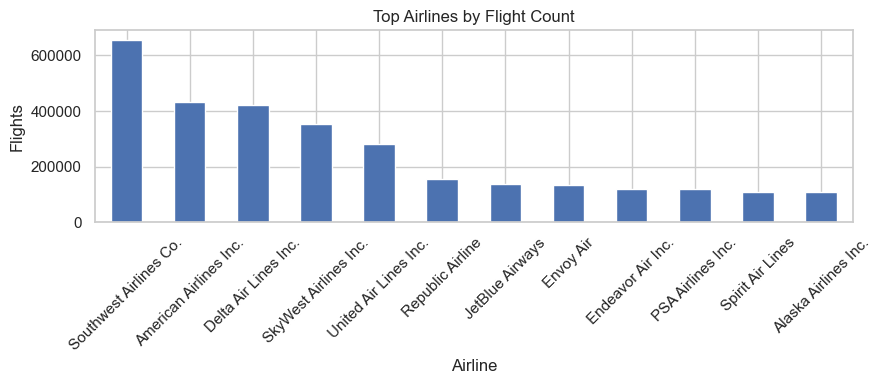

In [4]:
plt.figure(figsize=(9,4))
df["AIRLINE"].value_counts().head(12).plot(kind="bar")
plt.title("Top Airlines by Flight Count"); plt.xlabel("Airline"); plt.ylabel("Flights")
plt.xticks(rotation=45); plt.tight_layout(); plt.show()


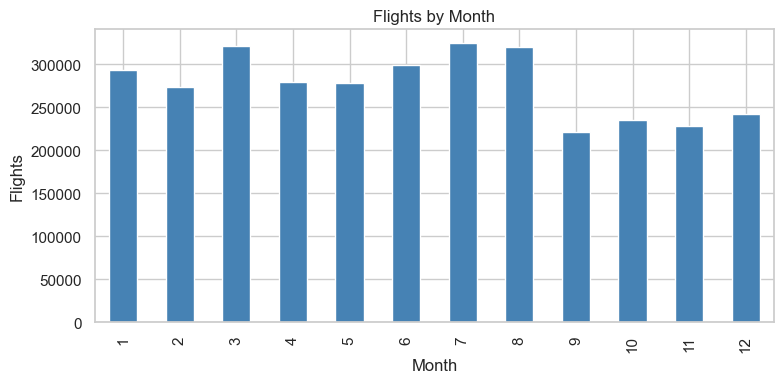

In [5]:
if "Month" in df.columns:
    m = df["Month"].value_counts().sort_index()
    m.plot(kind="bar", figsize=(8,4), color="steelblue")
    plt.title("Flights by Month"); plt.xlabel("Month"); plt.ylabel("Flights")
    plt.tight_layout(); plt.show()


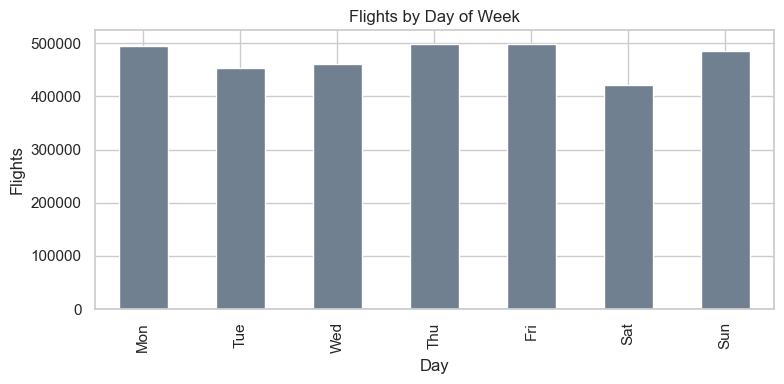

In [6]:
if "DayOfWeek" in df.columns:
    dow = df["DayOfWeek"].value_counts().sort_index()
    dow.index = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
    dow.plot(kind="bar", figsize=(8,4), color="slategray")
    plt.title("Flights by Day of Week"); plt.xlabel("Day"); plt.ylabel("Flights")
    plt.tight_layout(); plt.show()


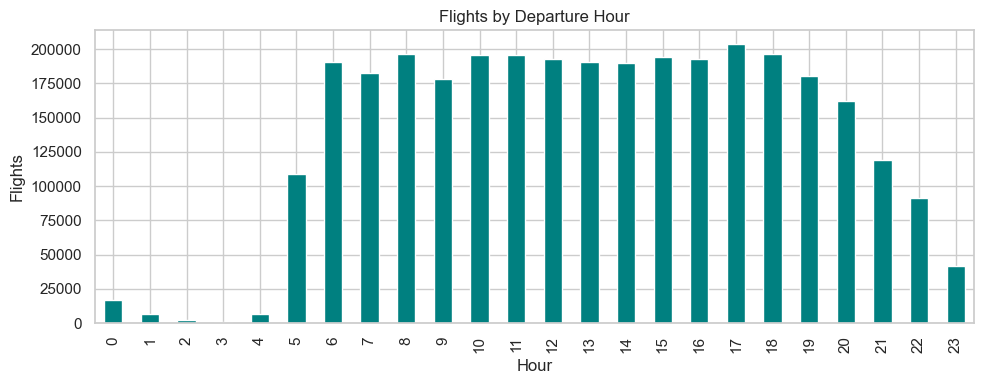

In [7]:
if "DEP_HOUR" in df.columns:
    h = df["DEP_HOUR"].dropna().astype(int).value_counts().sort_index()
    h.plot(kind="bar", figsize=(10,4), color="teal")
    plt.title("Flights by Departure Hour"); plt.xlabel("Hour"); plt.ylabel("Flights")
    plt.tight_layout(); plt.show()


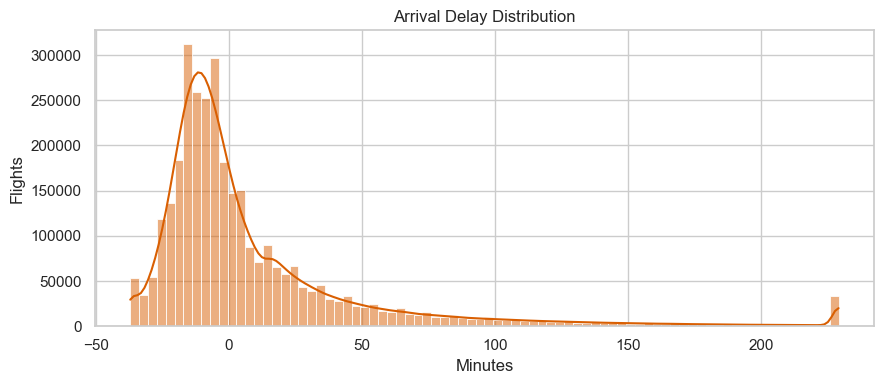

In [8]:
plt.figure(figsize=(9,4))
sns.histplot(df["ARR_DELAY"].dropna(), bins=80, kde=True, color="#d95f02")
plt.title("Arrival Delay Distribution"); plt.xlabel("Minutes"); plt.ylabel("Flights")
plt.tight_layout(); plt.show()


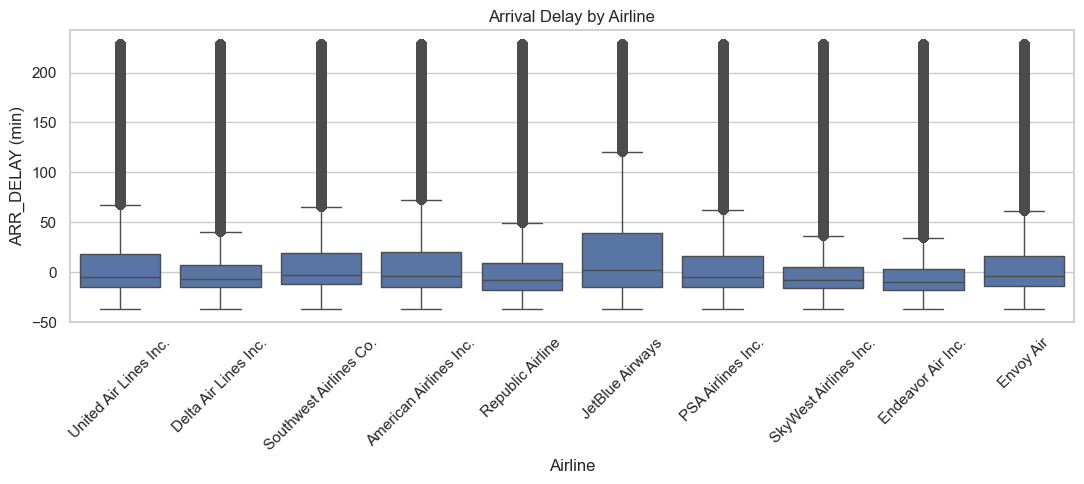

In [9]:
topA = df["AIRLINE"].value_counts().head(10).index
plt.figure(figsize=(11,5))
sns.boxplot(data=df[df["AIRLINE"].isin(topA)], x="AIRLINE", y="ARR_DELAY")
plt.title("Arrival Delay by Airline"); plt.xlabel("Airline"); plt.ylabel("ARR_DELAY (min)")
plt.xticks(rotation=45); plt.tight_layout(); plt.show()


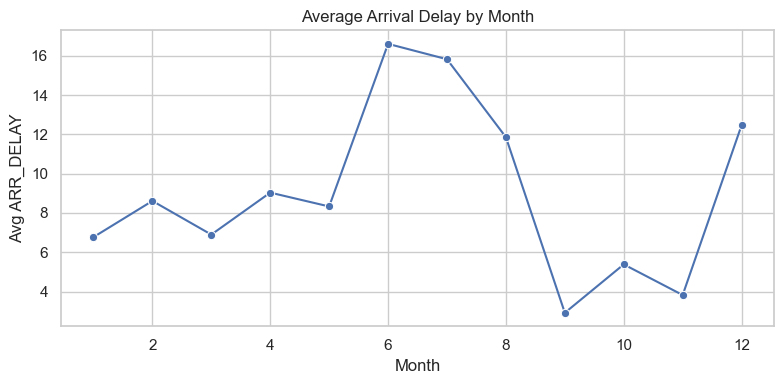

In [10]:
if "Month" in df.columns:
    mavg = df.groupby("Month")["ARR_DELAY"].mean().reset_index()
    plt.figure(figsize=(8,4))
    sns.lineplot(data=mavg, x="Month", y="ARR_DELAY", marker="o")
    plt.title("Average Arrival Delay by Month"); plt.xlabel("Month"); plt.ylabel("Avg ARR_DELAY")
    plt.tight_layout(); plt.show()


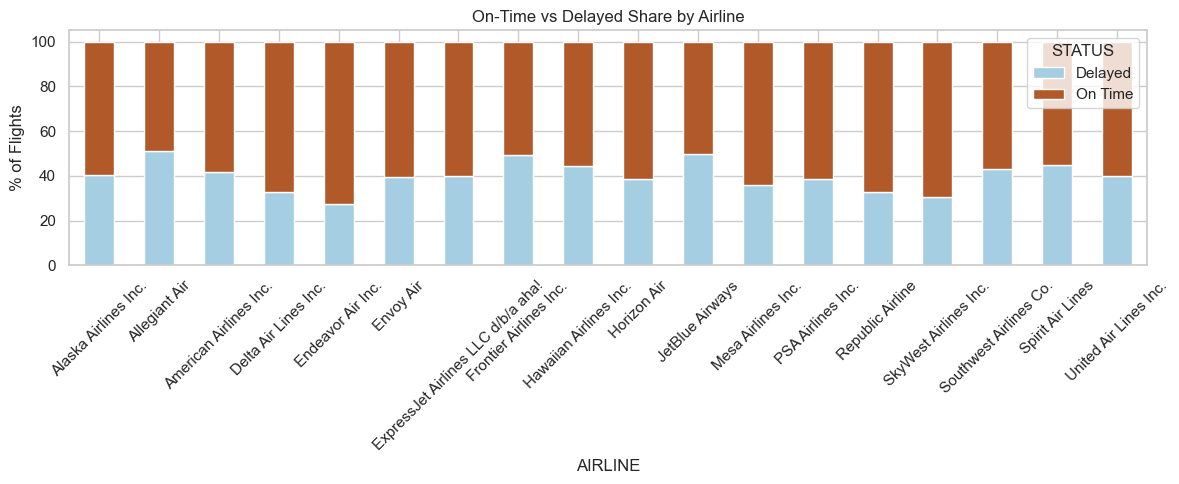

In [11]:
status = df.assign(STATUS=np.where(df["ARR_DELAY"]>0, "Delayed", "On Time"))
tab = pd.crosstab(status["AIRLINE"], status["STATUS"], normalize="index")*100
tab.plot(kind="bar", stacked=True, figsize=(12,5), colormap="Paired")
plt.title("On-Time vs Delayed Share by Airline"); plt.ylabel("% of Flights")
plt.xticks(rotation=45); plt.tight_layout(); plt.show()


C:\Users\roshi\AppData\Local\Temp\ipykernel_16332\2235564962.py:5: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=d, x="DEP_HOUR_INT", y="ARR_DELAY", inner="quartile", scale="width")


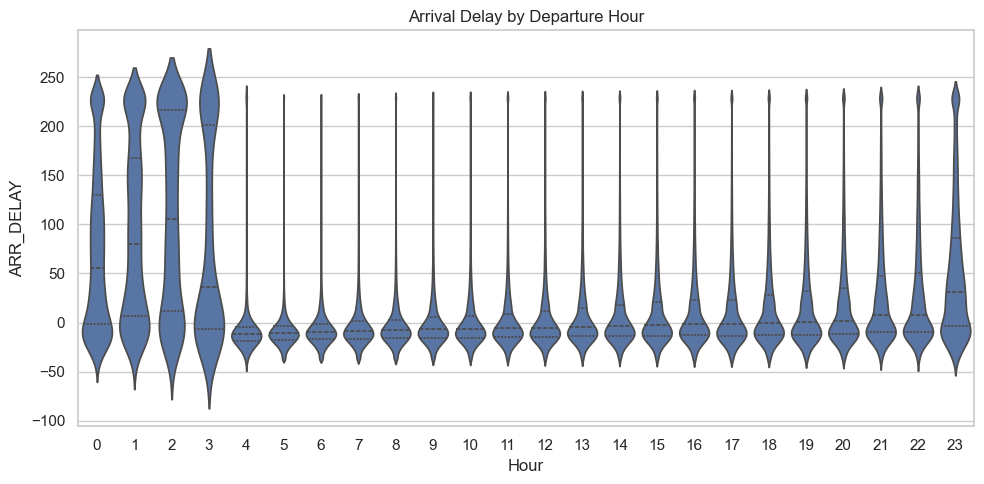

In [14]:
if "DEP_HOUR" in df.columns:
    d = df.dropna(subset=["DEP_HOUR"]).copy()
    d["DEP_HOUR_INT"] = d["DEP_HOUR"].round().astype(int)  # rounding handles floats like 10.0
    plt.figure(figsize=(10,5))
    sns.violinplot(data=d, x="DEP_HOUR_INT", y="ARR_DELAY", inner="quartile", scale="width")
    plt.title("Arrival Delay by Departure Hour"); plt.xlabel("Hour")
    plt.tight_layout(); plt.show()


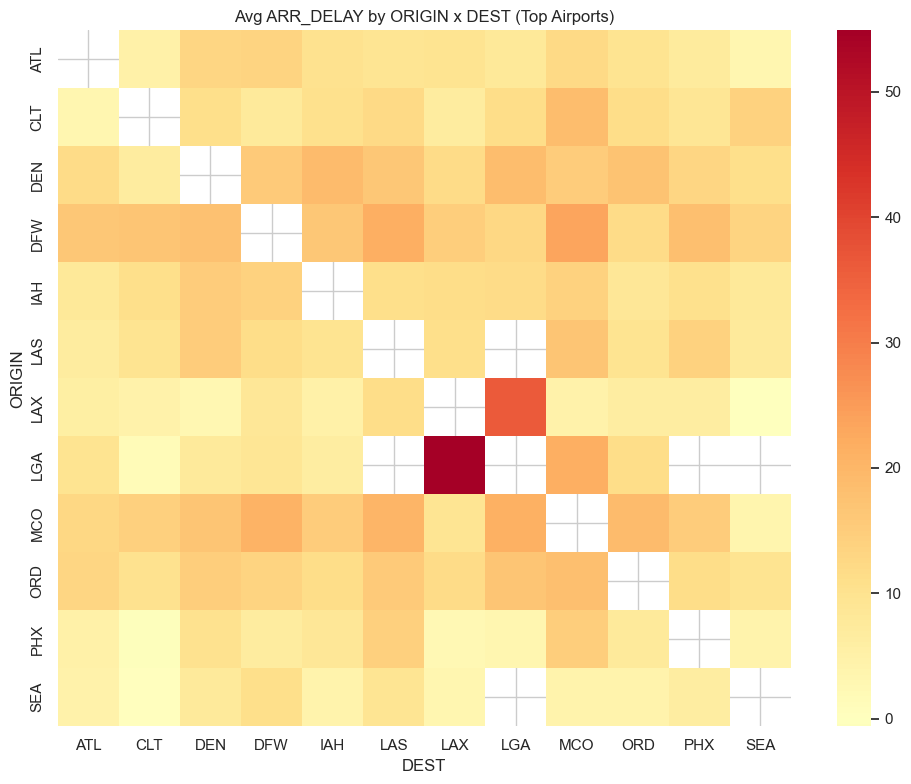

In [15]:
top_orig = df["ORIGIN"].value_counts().head(12).index
top_dest = df["DEST"].value_counts().head(12).index
grid = df[df["ORIGIN"].isin(top_orig) & df["DEST"].isin(top_dest)] \
        .pivot_table(index="ORIGIN", columns="DEST", values="ARR_DELAY", aggfunc="mean")
plt.figure(figsize=(10,8))
sns.heatmap(grid, cmap="RdYlGn_r", center=0)
plt.title("Avg ARR_DELAY by ORIGIN x DEST (Top Airports)")
plt.tight_layout(); plt.show()


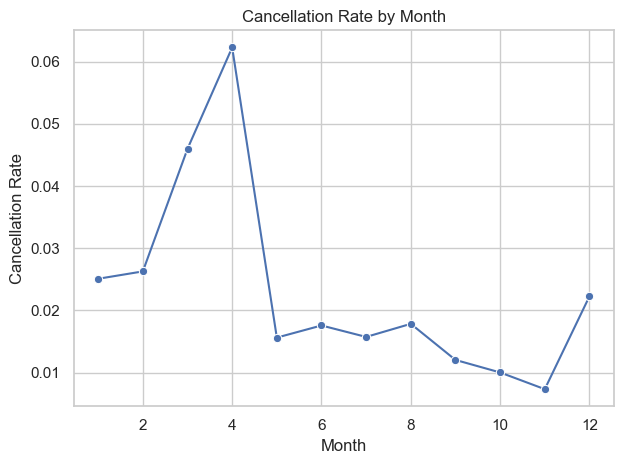

In [16]:
if "CANCELLED" in df.columns and "Month" in df.columns:
    canc = df.groupby("Month")["CANCELLED"].mean().reset_index()
    sns.lineplot(data=canc, x="Month", y="CANCELLED", marker="o")
    plt.title("Cancellation Rate by Month"); plt.ylabel("Cancellation Rate")
    plt.tight_layout(); plt.show()


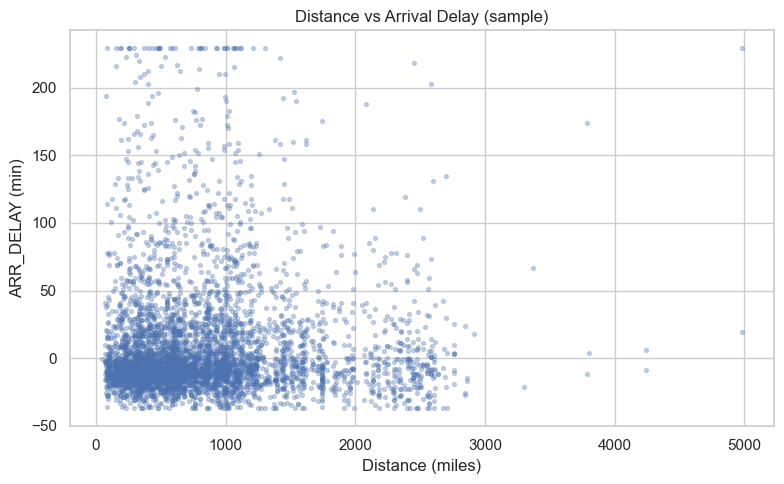

In [17]:
if "DISTANCE" in df.columns:
    sample = df.sample(min(5000, len(df)), random_state=42)
    plt.figure(figsize=(8,5))
    plt.scatter(sample["DISTANCE"], sample["ARR_DELAY"], s=8, alpha=0.3)
    plt.title("Distance vs Arrival Delay (sample)"); plt.xlabel("Distance (miles)"); plt.ylabel("ARR_DELAY (min)")
    plt.tight_layout(); plt.show()
